## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## Data

In [2]:
df = pd.read_excel('space_launches_advanced_report.xlsx')

df['Country'] = df['Launch Pad'].apply(lambda x: x.split(',')[-1].strip() if ',' in x else 'Unknown')

df.head()

,Name,Date (Central Time),Status,Provider,Rocket,Mission,Launch Pad,Country
0,Sputnik 8K74PS | Sputnik 1,1957-10-04 09:28 AM,Launch Successful,Soviet Space Program,Sputnik 8K74PS,Sputnik 1,"1/5 | Baikonur Cosmodrome, Republic of Kazakhstan",Republic of Kazakhstan
1,Sputnik 8K74PS | Sputnik 2,1957-11-02 02:30 PM,Launch Successful,Soviet Space Program,Sputnik 8K74PS,Sputnik 2,"1/5 | Baikonur Cosmodrome, Republic of Kazakhstan",Republic of Kazakhstan
2,Vanguard | Vanguard,1957-12-06 04:44 AM,Launch Failure,US Navy,Vanguard,Vanguard,"Launch Complex 18A | Cape Canaveral, FL, USA",USA
3,Juno-I | Explorer 1,1958-01-31 03:47 PM,Launch Successful,Army Ballistic Missile Agency,Juno-I,Explorer 1,"Launch Complex 26A | Cape Canaveral, FL, USA",USA
4,Vanguard | Vanguard,1958-02-04 07:33 PM,Launch Failure,US Navy,Vanguard,Vanguard,"Launch Complex 18A | Cape Canaveral, FL, USA",USA


In [3]:
df_past = df[(df['Status'] != 'Go for Launch') & (df['Status'] != 'To Be Confirmed') & (df['Status'] != 'To Be Determined')] 

df_future = df[(df['Status'] != 'Launch Successful') & (df['Status'] != 'Launch Failure') & (df['Status'] != 'Launch was a Partial Failure')] 

## Exploration

### Who has launched the most rockets in the past?

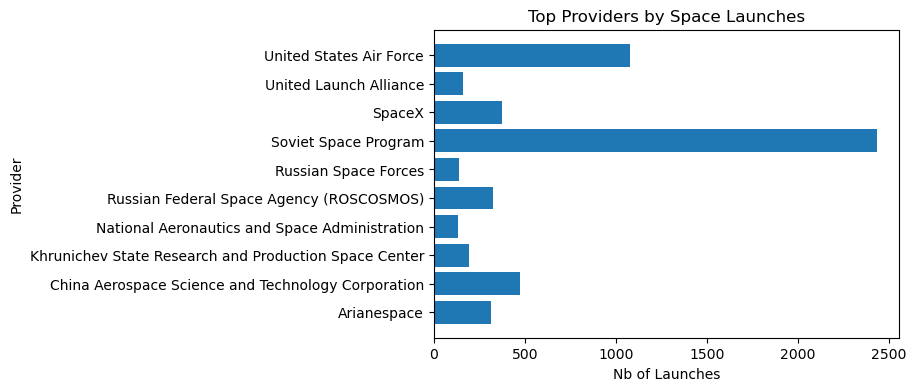

In [11]:
nb_missions = df_past.groupby(by='Provider')['Name'].count().reset_index(name='nb_missions')
nb_missions1 = nb_missions[nb_missions['nb_missions'] > 100]

plt.figure(figsize=(6, 4))
plt.barh(nb_missions1['Provider'], nb_missions1['nb_missions'])
plt.xlabel('Nb of Launches')
plt.ylabel('Provider')
plt.title("Top Providers by Space Launches")
plt.show()


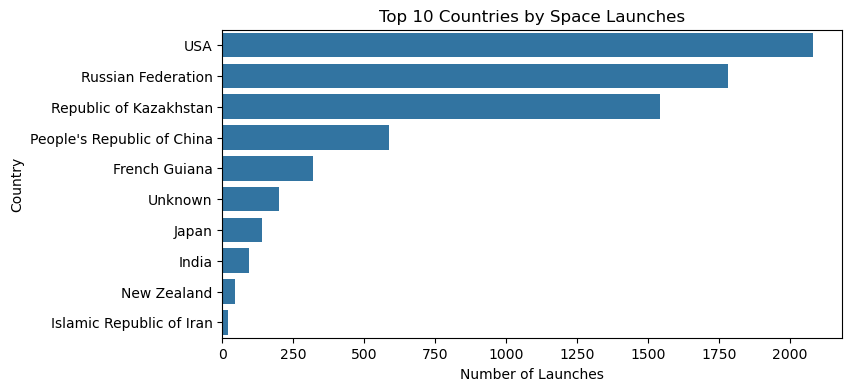

In [5]:
top_countries = df_past['Country'].value_counts().head(10)

plt.figure(figsize=(8, 4))
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.xlabel("Number of Launches")
plt.ylabel("Country")
plt.title("Top 10 Countries by Space Launches")
plt.show()

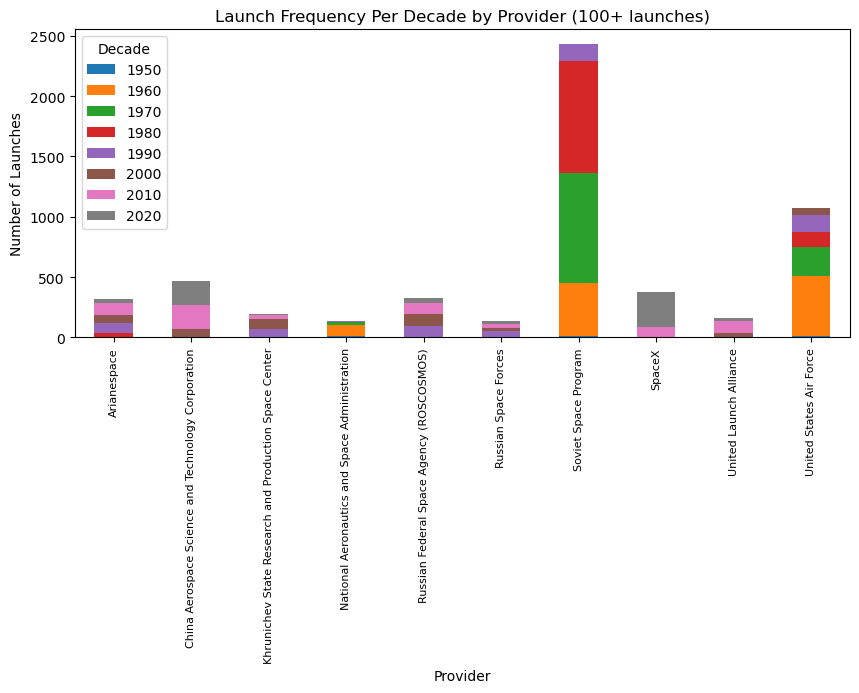

In [6]:
df_past = df_past.copy()

df_past.loc[:, 'Date'] = pd.to_datetime(df_past['Date (Central Time)'])
df_past['Month'] = df_past['Date'].dt.month
df_past.loc[:, 'Year'] = df_past['Date'].dt.year
df_past.loc[:, 'Decade'] = (df_past['Year'] // 10) * 10


launches_per_decade = df_past.groupby(['Provider', 'Decade']).size().unstack(fill_value=0)
launches_per_provider = df_past.groupby('Provider').size()
valid_providers = launches_per_provider[launches_per_provider >= 100].index

launches_per_decade_filtered = launches_per_decade.loc[valid_providers]

launches_per_decade_filtered.plot(kind='bar', stacked=True, figsize=(10, 4))
plt.xlabel("Provider")
plt.ylabel("Number of Launches")
plt.title("Launch Frequency Per Decade by Provider (100+ launches)")
plt.xticks(rotation=90, size = 8)
plt.show()

### Which years were the most active?

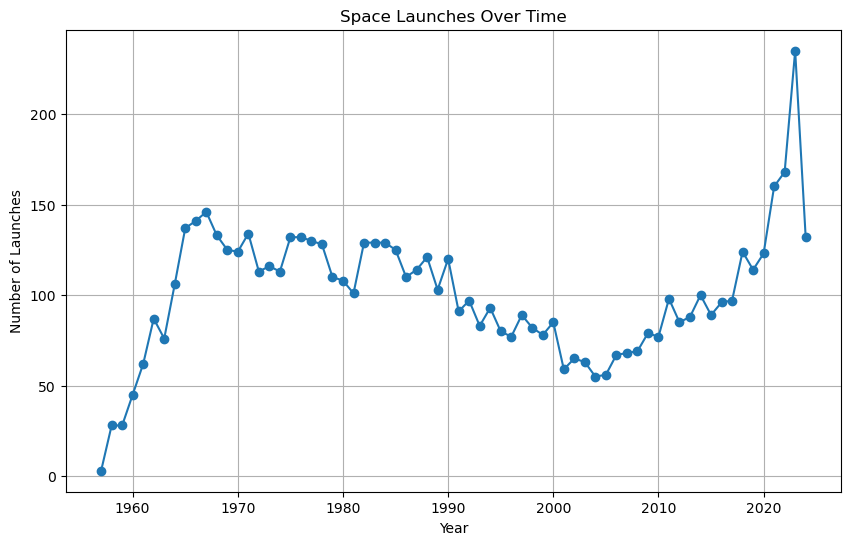

In [7]:
launches_per_year = df_past.groupby('Year').size()

plt.figure(figsize=(10, 6))
plt.plot(launches_per_year.index, launches_per_year.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.title('Space Launches Over Time')
plt.grid(True)
plt.show()


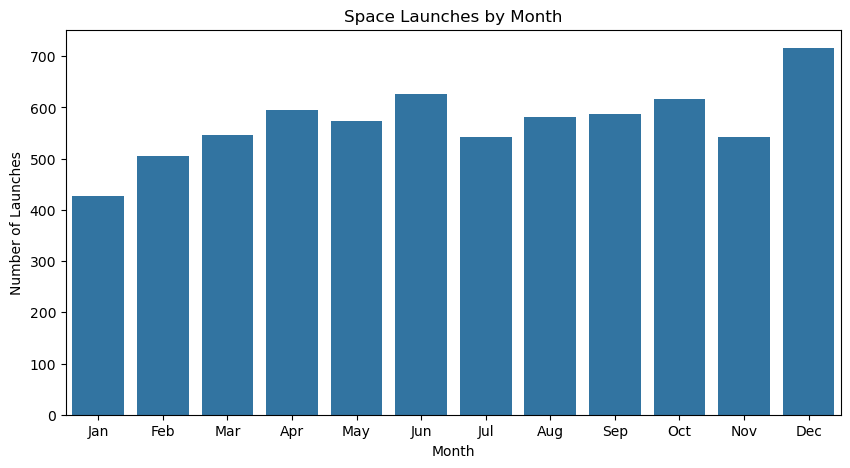

In [8]:
launches_per_month = df_past.groupby('Month').size()

plt.figure(figsize=(10, 5))
sns.barplot(x=launches_per_month.index, y=launches_per_month.values)
plt.xlabel('Month')
plt.ylabel('Number of Launches')
plt.title('Space Launches by Month')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


### Which rockets were the most used?

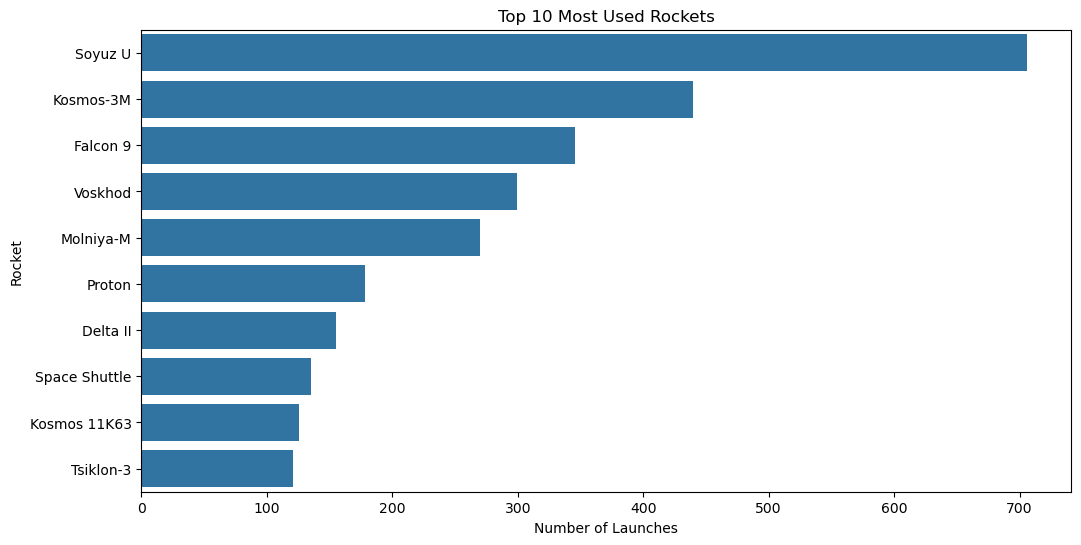

In [9]:
top_rockets = df_past['Rocket'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_rockets.index, x=top_rockets.values)
plt.xlabel("Number of Launches")
plt.ylabel("Rocket")
plt.title("Top 10 Most Used Rockets")
plt.show()


### Which launches are successful?

<Figure size 1200x600 with 0 Axes>

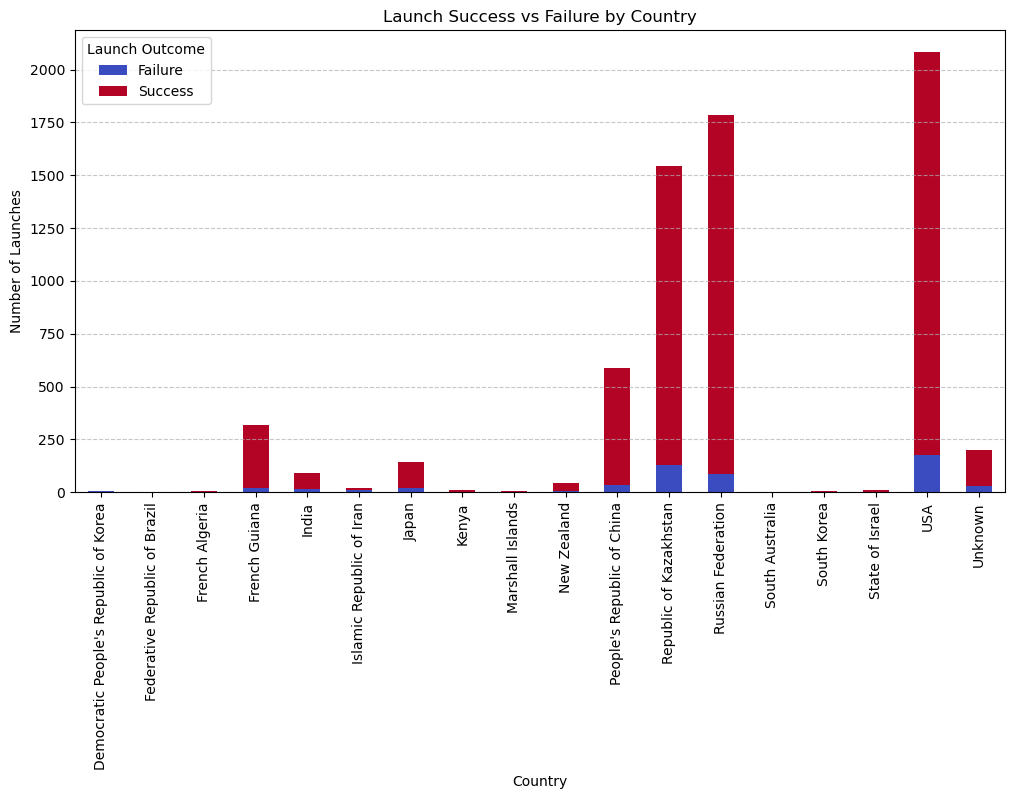

In [10]:
df_past = df_past.copy()

df_past['Launch Outcome'] = df_past['Status'].apply(lambda x: 'Success' if 'Successful' in x else 'Failure')

country_success = df_past.groupby(['Country', 'Launch Outcome']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))

country_success.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')

plt.xlabel("Country")
plt.ylabel("Number of Launches")
plt.title("Launch Success vs Failure by Country")
plt.xticks(rotation=90)
plt.legend(title="Launch Outcome")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
